In [1]:
import pandas as pd 
import statsmodels.formula.api as smf
import numpy as np


In [4]:
data = pd.read_csv(r"C:\Users\ADMIN\Downloads\Salary_Data (1).csv")
data


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
data['log_s']= np.log(data.Salary)
data['log_e']= np.log(data.YearsExperience)
data.head()

,YearsExperience,Salary,log_s,log_e
0,1.1,39343.0,10.580073,0.095310
1,1.3,46205.0,10.740843,0.262364
2,1.5,37731.0,10.538237,0.405465
3,2.0,43525.0,10.681091,0.693147
4,2.2,39891.0,10.593906,0.788457


In [16]:
data.shape

(30, 4)

In [8]:
data.describe()

,YearsExperience,Salary,log_s,log_e
count,30.000000,30.000000,30.000000,30.000000
mean,5.313333,76003.000000,11.173975,1.504979
std,2.837888,27414.429785,0.368787,0.624233
min,1.100000,37731.000000,10.538237,0.095310
25%,3.200000,56720.750000,10.945892,1.163151
50%,4.700000,65237.000000,11.085708,1.546656
75%,7.700000,100544.750000,11.518272,2.040171
max,10.500000,122391.000000,11.714976,2.351375


In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
## checking the co_realation of the data
data.corr()

,YearsExperience,Salary,log_s,log_e
YearsExperience,1.000000,0.978242,0.965384,0.953797
Salary,0.978242,1.000000,0.988531,0.924061
log_s,0.965384,0.988531,1.000000,0.951428
log_e,0.953797,0.924061,0.951428,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
 2   log_s            30 non-null     float64
 3   log_e            30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


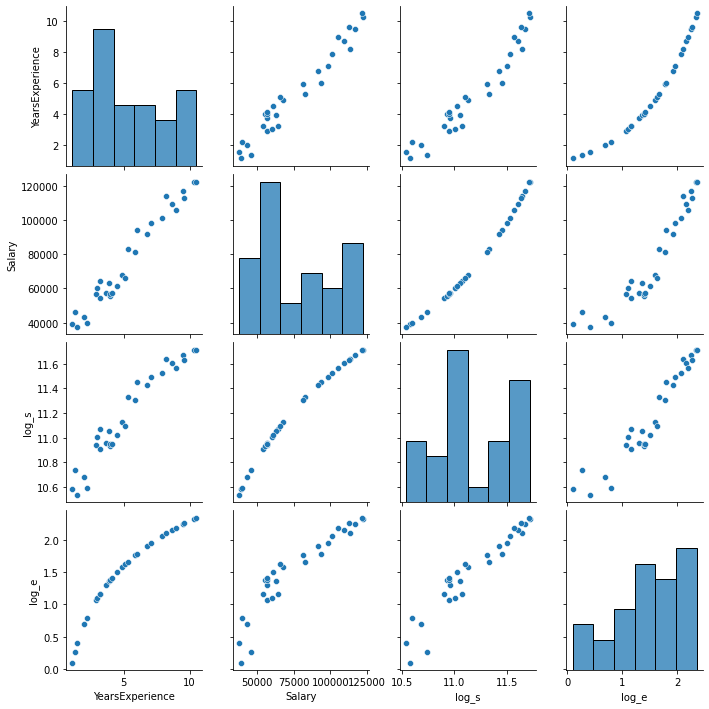

In [14]:
sns.pairplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x23ee1106220>,
 'caps': [<matplotlib.lines.Line2D at 0x23ee1106760>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ee10f5f40>],
 'medians': [<matplotlib.lines.Line2D at 0x23ee1106c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ee1106eb0>],
 'means': []}

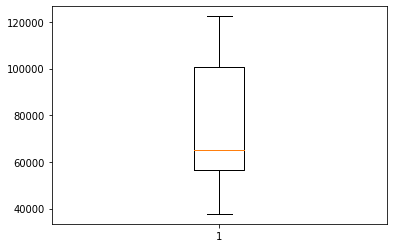

In [17]:
## checking for outliers
plt.boxplot(data['Salary'])

In [18]:
## buliding the model 
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [19]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [20]:
model.rsquared

0.9569566641435086

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        17:28:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y_pre = pd.DataFrame(model.predict(data['YearsExperience']))

In [23]:
y_pre

,0
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [24]:
#model using the log valuve
model_log=smf.ols("log_s~log_e" ,data=data).fit()

In [25]:
model_log.rsquared

0.905215072581715

In [26]:
#model using the log valuve
model_log1=smf.ols("Salary~log_e" ,data=data).fit()

In [28]:
model_log1.rsquared

0.8538888828756969

In [30]:
#model using the log valuve
model_log2=smf.ols("log_e~YearsExperience" ,data=data).fit()
model_log2.rsquared

0.9097288880389254

In [46]:
## buliding using leniar  models from sklearn 
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x,y)

LinearRegression()

In [47]:
x=data.drop('Salary',axis=1)
y=data['Salary']

In [48]:
model1.score(x,y)

0.9965122972963998

In [50]:
### Predict delivery time using sorting time 
data1 = pd.read_csv(r"C:\Users\ADMIN\Downloads\delivery_time.csv")

In [51]:
data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [52]:
data1.isna().any()

Delivery Time    False
Sorting Time     False
dtype: bool

In [53]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


({'whiskers': [<matplotlib.lines.Line2D at 0x23ecc5cc7c0>,
  'caps': [<matplotlib.lines.Line2D at 0x23ecc5ccc10>,
  'boxes': [<matplotlib.lines.Line2D at 0x23ecc5cc520>,
  'medians': [<matplotlib.lines.Line2D at 0x23ecc5db190>,
  'fliers': [<matplotlib.lines.Line2D at 0x23ecc5db430>,
  'means': []},
 {'whiskers': [<matplotlib.lines.Line2D at 0x23ecc5eff40>,
  'caps': [<matplotlib.lines.Line2D at 0x23ecc5fa4c0>,
  'boxes': [<matplotlib.lines.Line2D at 0x23ecc5efca0>],
  'medians': [<matplotlib.lines.Line2D at 0x23ecc5faa00>],
  'fliers': [<matplotlib.lines.Line2D at 0x23ecc5faca0>],
  'means': []})

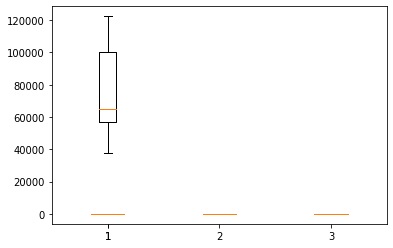

In [54]:
plt.boxplot(x), plt.boxplot(y)

In [55]:
data1['log_d']=np.log(data1['Delivery Time'])

In [56]:
## model building
x=data1.drop('Delivery Time',axis=1)
y=data1['Delivery Time']

In [57]:
model_d1 = smf.ols("log_d~x",data=data1).fit()

In [59]:
model_d1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_d   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.702e+30
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          4.06e-270
Time:                        11:29:05   Log-Likelihood:                 718.44
No. Observations:                  21   AIC:                            -1431.
Df Residuals:                      18   BIC:                            -1428.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.56e-15   1.03e-15     -1.518      0.146   -3.72e-15    5.99e-16
x[0]       -8.475e-17   5.93e-17     -1.429      0.170   -2.09e-16    3.99e-17
x[1]           1.0000   4.74e-16   2.11e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       40.811   Durbin-Watson:                   0.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.506
Skew:                          -0.289   Prob(JB):                        0.173
Kurtosis:                       1.083   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
data1['log_s']=np.log(data1['Sorting Time'])

In [61]:
model_d2=smf.ols("y~log_s",data=data1).fit()

In [62]:
model_d2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           2.64e-06
Time:                        11:30:24   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
log_s          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model_d3=smf.ols("log_d~log_s",data=data1).fit()

In [64]:
model_d3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_d   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                        11:30:58   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_s          0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model_d=smf.ols("y~x",data=data1).fit()

In [66]:
model_d.params

Intercept   -26.778966
x[0]         -0.010935
x[1]         15.726474
dtype: float64

In [67]:
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     236.6
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.19e-13
Time:                        11:31:33   Log-Likelihood:                -28.678
No. Observations:                  21   AIC:                             63.36
Df Residuals:                      18   BIC:                             66.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.7790      2.902     -9.228      0.000     -32.876     -20.682
x[0]          -0.0109      0.168     -0.065      0.949      -0.363       0.341
x[1]          15.7265      1.338     11.750      0.000      12.915      18.538
==============================================================================
Omnibus:                       17.865   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.430
Skew:                           1.862   Prob(JB):                     9.95e-05
Kurtosis:                       5.682   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
y_d_pre=pd.DataFrame(model_d.predict(x))

In [69]:
y_d_pre.head()

,0
0,20.991292
1,14.108428
2,20.069913
3,23.102205
4,26.067379


In [70]:
### using the sklearn 
model_d1=LinearRegression()

In [71]:
model_d1.fit(x,y)

LinearRegression()

In [72]:
model_d1.score(x,y)

0.9633554927289302